<h1>Expert level</h1>

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def logistic_map(x, r):
    return r * x * (1 - x)

---

<h2>Task 1</h1>

Следует ли устойчивость из ассимтотической устойчивости?

Неподвижная точка x∗ устойчива, если

∀ε > 0 ∃δ > 0 : |x0 − x∗| < δ ⇒ |xn − x∗| < ε ∀n

Чтобы выяснить, следует ли асимптотическая устойчивость x∗ из условия

∃δ0 > 0 : |x0 − x∗| < δ0 =⇒ lim (n→∞) xn = x∗,

необходимо определить, следует ли из этого условия устойчивость x∗

Ответ: в общем случае не следует.

Перепишем условие:

∃δ0 > 0 : |x0 − x∗| < δ0 ⇒ ∀ε > 0 ∃N = N (ε) ∈ N > 0 : ∀n > N : |xn − x∗| < ε

Проблема в том, что это выполняется только для ∀n > N , а для устойчивости необходимо, чтобы неравенство выполнялось для любого n. Из нашего условия не следует, что |xn − x∗| < ε для n ≤ N

---

---

<h2>Task 2</h1>

Следует ли ассимптотическая устойчивость из устойчивости при r ∈ (0; 1)

Неподвижная точка x∗ устойчива:

∀ε > 0 ∃δ > 0 : |x0 − x∗| < δ ⇒ |xn − x∗| < ε ∀n

В Normal level мы доказывали, что при r ∈ (0; 1), функция f(x_{n+1}) = r * xn * (1 - xn) монотонно убывает и она ограничена

Отсюда следует, что по теореме Вейерштрасса у f(x) есть предел, который равен 0, то есть к x∗ (также доказали в номале)

Получаем:

∃δ0 > 0 : |x0 − x∗| < δ0 ⇒ lim (n→∞) xn = x∗ 

---

---

<h2>Task 3</h1>

Доказать что x = 0 является неустойчивой при r ∈ (2; 3)

Если точка является устойчивой, то:

∀ε > 0 ∃δ > 0 : |x0 − x∗| < δ ⇒ |xn − x∗| < ε ∀n

То есть существует сколь угодно малое начально отклонение от неё, такое что траектория со временем уходит от x∗

Рассмотрим сколь угодно малое x0:

f(x1) = r * x0 * (1 - x0)

Поскольку x0 мало, можно считать, что 1−x0≈1, поэтому: x1≈r⋅x0

r > 2 по условию ⇒ x1 > x0

Так как x1≈rεx0, и r ∈ (2; 3), то x1​ всё ещё мало, и снова:

x2 ≈ r⋅(rx0) = r^2x0 > rx0 = x1

В таком случае f(x) при сколь угодно малом x0 будет стремться к (1 - r) / r (другой устойчивой точке)

---

---

<h2>Task 4</h1>

Потроить две траектории лестницы Ламерея для логистического отображения при заданных параметрах x0, y0 = x0 + ε и r. Также построение графика для r = 4, интерпретация результатов.

In [6]:
def plot_lameray_staircase(x0, y0, r, n_steps=20):
    """Строит лестницу Ламерея для двух траекторий логистического отображения."""
    
    x_traj = [x0]
    y_traj = [y0]
    
    for _ in range(n_steps):
        x_traj.append(logistic_map(x_traj[-1], r))
        y_traj.append(logistic_map(y_traj[-1], r))
    
    # Создаём график
    _, ax = plt.subplots(figsize=(10, 8))

    x_vals = np.linspace(0, 1, 500)
    y_vals = logistic_map(x_vals, r)
    ax.plot(x_vals, y_vals, 'b-', linewidth=2, label=f'f(x) = {r}·x·(1−x)')
    
    # Диагональ y = x
    ax.plot(x_vals, x_vals, 'k--', linewidth=1.5, label='y = x')
    
    # Траектория x
    ax.plot(x_traj[:-1], x_traj[1:], 'ro-', markersize=6, label=f'Траектория x (x₀={x0:.4f})')
    # Лестница для x
    for i in range(len(x_traj)-1):
        ax.plot([x_traj[i], x_traj[i]], [x_traj[i], x_traj[i+1]], 'r--', alpha=0.7)
        ax.plot([x_traj[i], x_traj[i+1]], [x_traj[i+1], x_traj[i+1]], 'r--', alpha=0.7)
    
    # Траектория y
    ax.plot(y_traj[:-1], y_traj[1:], 'go-', markersize=6, label=f'Траектория y (y₀={y0:.4f})')
    # Лестница для y
    for i in range(len(y_traj)-1):
        ax.plot([y_traj[i], y_traj[i]], [y_traj[i], y_traj[i+1]], 'g--', alpha=0.7)
        ax.plot([y_traj[i], y_traj[i+1]], [y_traj[i+1], y_traj[i+1]], 'g--', alpha=0.7)
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel('xₙ')
    ax.set_ylabel('xₙ₊₁')
    ax.set_title(f"Лестница Ламерея, r={r}, x₀={x0}, y₀={y0}")
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return x_traj, y_traj

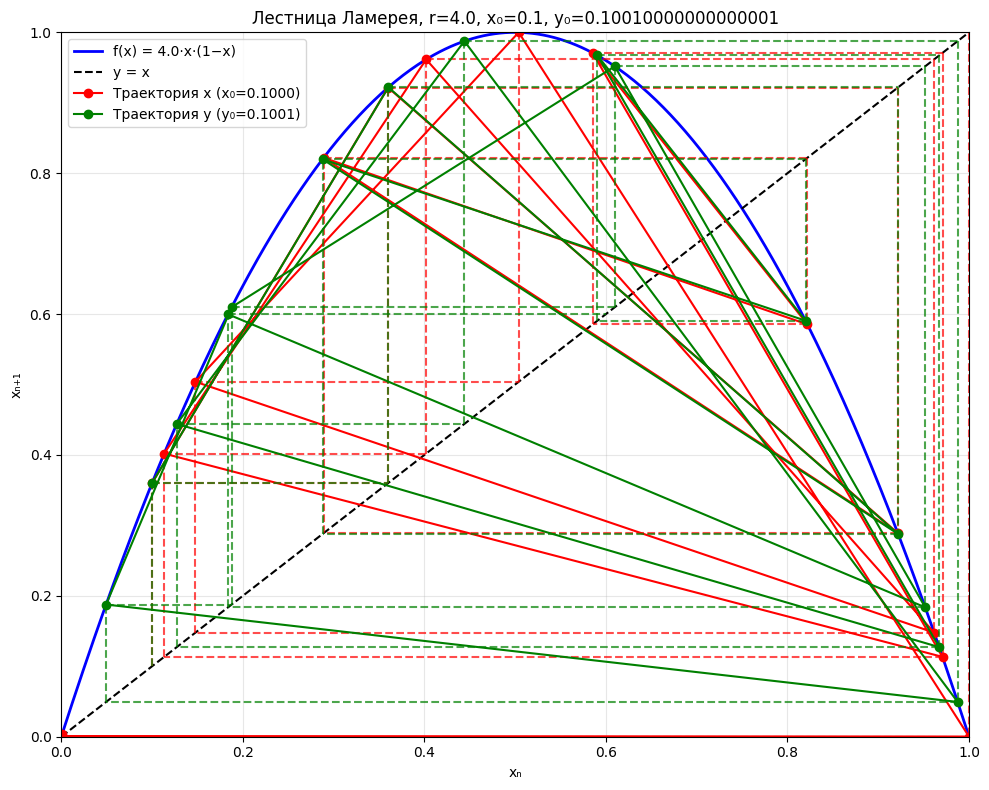

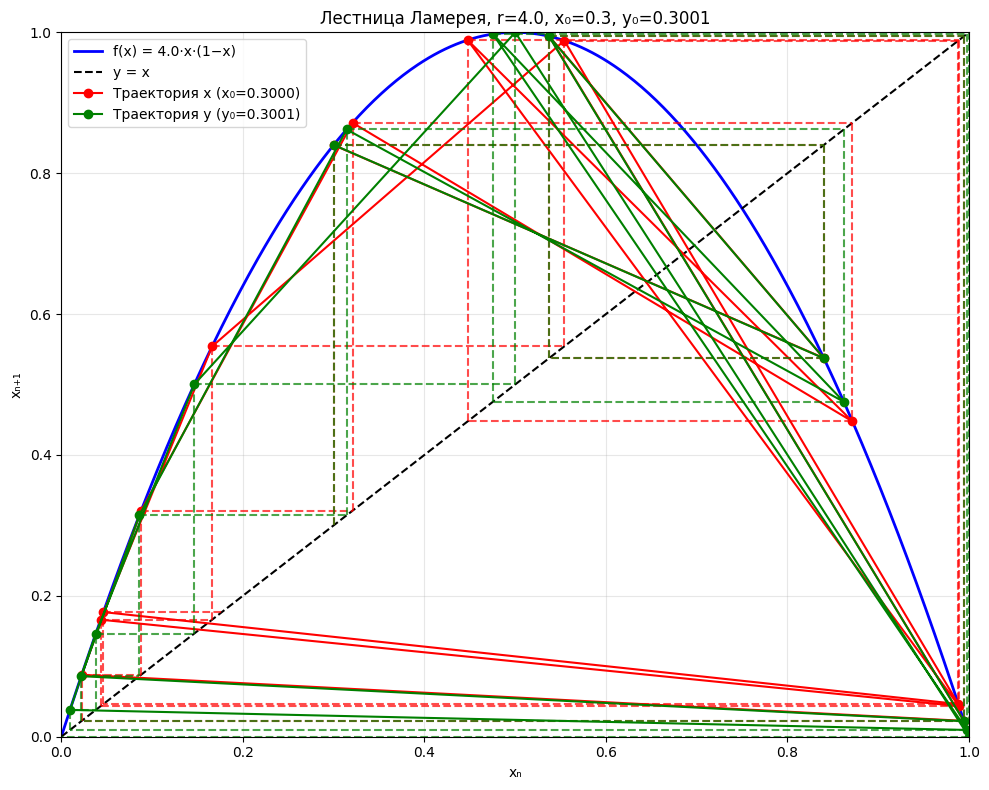

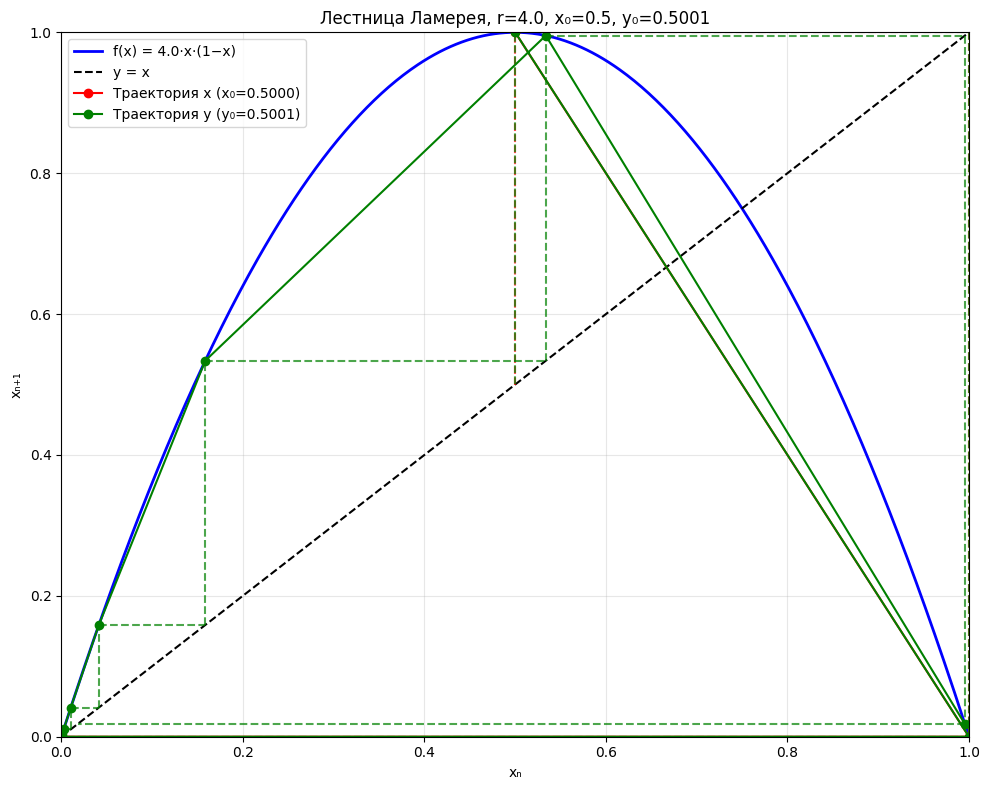

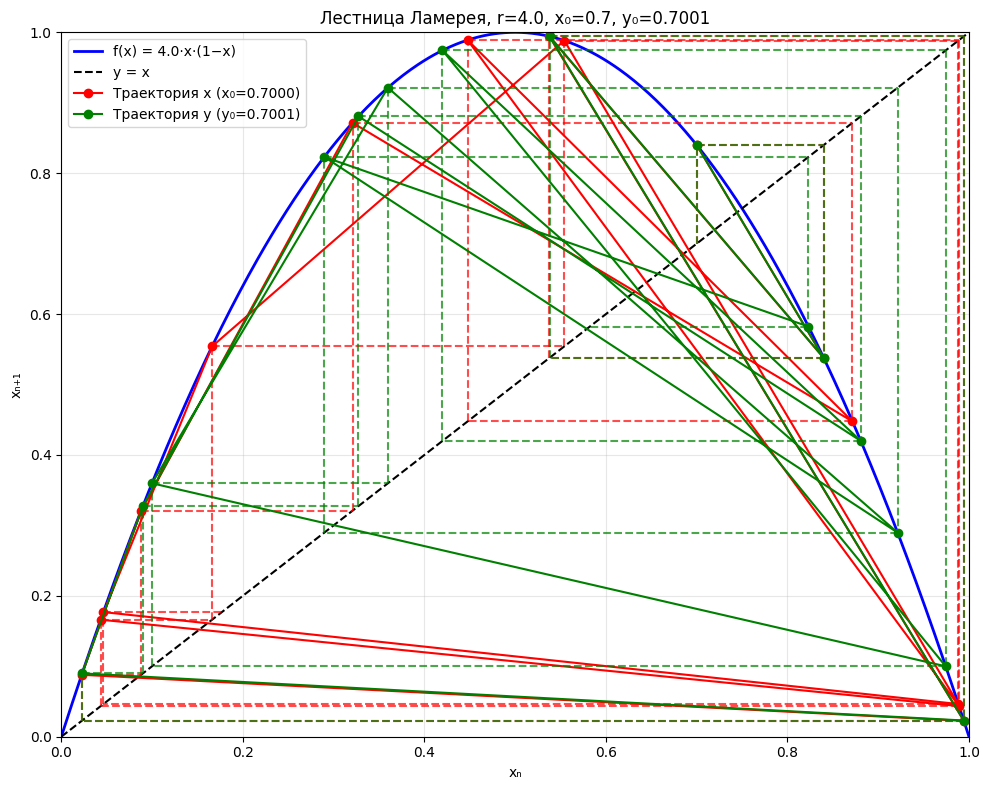

In [7]:
r = 4.0
x0s = [0.1, 0.3, 0.5, 0.7]
epsilon = 1e-4
y0s = [x0 + epsilon for x0 in x0s]

for i in range(len(x0s)):
    x_traj, y_traj = plot_lameray_staircase(x0s[i], y0s[i], r, n_steps=15)



Интерпретация результатов:

При r = 4 логистическое отображение демонстрирует хаотическое поведение. Это означает:

- Чувствительность к начальным условиям — даже при очень малом отличии между x0 и y0 (например, ε = 10⁻⁵), траектории быстро расходятся и становятся совершенно не похожими друг на друга уже через 5–10 итераций.
- Непредсказуемость
- Отсутствие периодичности — траектории не сходятся к фиксированной точке или циклу, а блуждают по всему интервалу без повторения.
- Лестница Ламерея показывает динамику — каждая "ступенька" отражает переход от xₙ к xₙ₊₁, и видно, как малейшее различие в начальной точке приводит к кардинальному расхождению путей.


---

---

<h2>Task 5</h2>

Построение и анализ бифуркационной диаграммы логистического отображения.

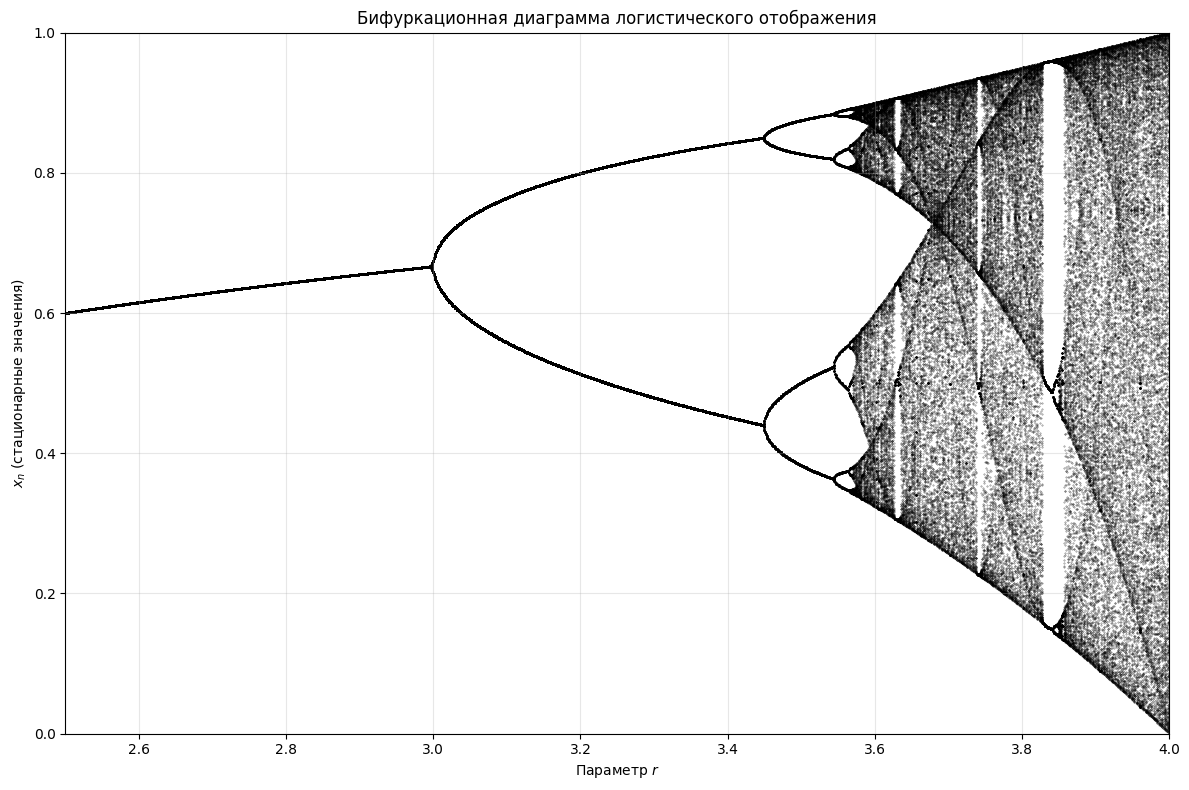

In [8]:
def bifurcation_diagram(r_min=2.5, r_max=4.0, dr=0.001, x0=0.5, n_skip=950, n_save=50):
    """
    Строит бифуркационную диаграмму логистического отображения.
    
    r_min, r_max: диапазон параметра r
    dr: шаг по r
    x0: начальное значение 
    n_skip: сколько первых итераций "сжигаем" (для устранения переходного процесса)
    n_save: сколько значений сохраняем для каждого r (последние n_save после n_skip)
    """
    r_values = np.arange(r_min, r_max + dr/2, dr)
    x_data = []
    r_data = []
    
    for r in r_values:
        x = x0
        # "Сжигаем" первые n_skip итераций
        for _ in range(n_skip):
            x = logistic_map(x, r)
        
        # Сохраняем последние n_save значений
        for _ in range(n_save):
            x = logistic_map(x, r)
            x_data.append(x)
            r_data.append(r)
    
    return r_data, x_data

# Построение диаграммы
r_vals, x_vals = bifurcation_diagram(
    r_min=2.5, 
    r_max=4.0, 
    dr=0.001, 
    x0=0.5, 
    n_skip=800, 
    n_save=200
)

plt.figure(figsize=(12, 8))
plt.scatter(r_vals, x_vals, s=0.1, color='black', alpha=0.6)
plt.title('Бифуркационная диаграмма логистического отображения')
plt.xlabel('Параметр $r$')
plt.ylabel('$x_n$ (стационарные значения)')
plt.xlim(2.5, 4.0)
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Анализ и интерпретация графика

1. При малых r (до ~3.0):

    - Система имеет одну устойчивую неподвижную точку, на графике видна одна ветвь.

2. При r ≈ 3.0:

    - Происходит первая бифуркация: неподвижная точка теряет устойчивость, и появляется устойчивый цикл периода 2, на графике две ветви.

3. При 3.4 < r < 3.55:

    - Последовательность бифуркаций удвоения периода: период 4, 8, 16, ...  ∞
    - На графике видны всё более частые разветвления.

4. При r > r_∞ ≈ 3.6:

    - Начинается хаотический режим — вместо точек появляются сплошные полосы.
    - В хаосе есть окна периодичности — например, окно с циклом периода 3 при r ≈ 3.83.

5. При r = 4:

    Хаос.

r_∞ это точка накопления бифуркаций удвоения периода — значение r, при котором период стремится к бесконечности.

r_∞ ≈ 3.6

---

---

<h2>Task 6</h2>

С помощью увеличения фрагмента около r ≈ 3.83 визуализируйте фрактульную структуру (самоподобие) диаграммы.

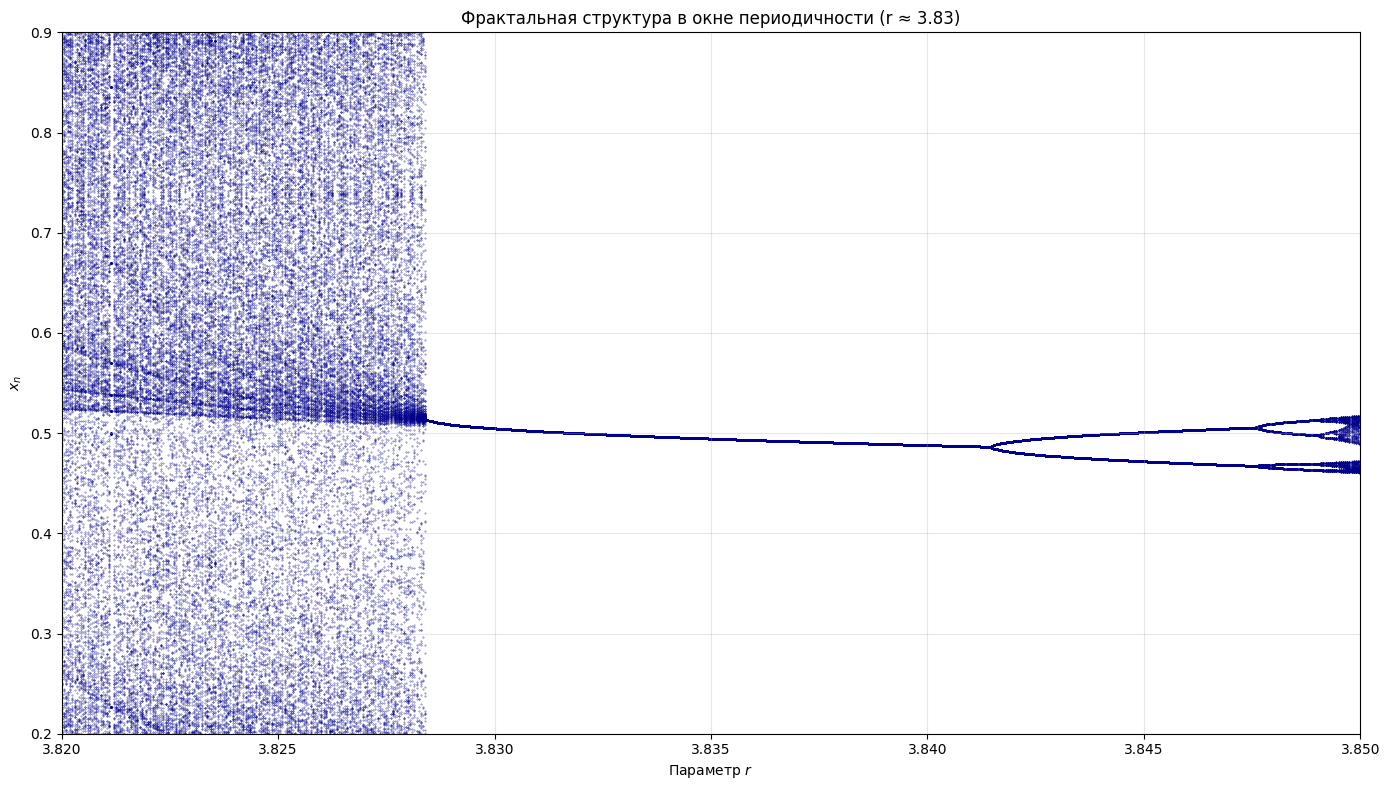

In [9]:
# Увеличиваем область около r ≈ 3.83
r_zoom, x_zoom = bifurcation_diagram(
    r_min=3.82,
    r_max=3.85,
    dr=0.00005,  # очень мелкий шаг
    n_skip=1500,
    n_save=500
)

plt.figure(figsize=(14, 8))
plt.scatter(r_zoom, x_zoom, s=0.1, color='darkblue', alpha=0.7)
plt.title('Фрактальная структура в окне периодичности (r ≈ 3.83)')
plt.xlabel('Параметр $r$')
plt.ylabel('$x_n$')
plt.xlim(3.82, 3.85)
plt.ylim(0.2, 0.9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---

---

<h2>Task 7</h2>

Приближенно найдите значения r, при которых возникают циклы с периодом 3, 5, 6. Отобразите область(-и) бифуркационной диаграммы с соответсвующими окнами периодичности.

In [10]:
r_vals, x_vals = bifurcation_diagram(
    r_min=2.5, 
    r_max=4.0, 
    dr=0.001, 
    x0=0.5, 
    n_iter=1000, 
    n_skip=800, 
    n_save=200
)

plt.figure(figsize=(14, 8))
plt.scatter(r_vals, x_vals, s=0.1, color='black', alpha=0.6, label='Бифуркационная диаграмма')

# Окна периодичности (приблизительно)
windows = [
    # Период 3
    {'r_min': 3.82, 'r_max': 3.85, 'y_min': 0.2, 'y_max': 0.9, 'label': 'Период 3', 'color': 'red'},
    # Период 5
    {'r_min': 3.73, 'r_max': 3.75, 'y_min': 0.2, 'y_max': 0.9, 'label': 'Период 5', 'color': 'green'},
    # Период 6
    {'r_min': 3.62, 'r_max': 3.64, 'y_min': 0.2, 'y_max': 0.9, 'label': 'Период 6', 'color': 'blue'},
]

# Рисуем рамки
for win in windows:
    plt.axvline(win['r_min'], color=win['color'], linestyle='--', linewidth=1, alpha=0.8)
    plt.axvline(win['r_max'], color=win['color'], linestyle='--', linewidth=1, alpha=0.8)
    plt.axhline(win['y_min'], color=win['color'], linestyle='--', linewidth=1, alpha=0.8)
    plt.axhline(win['y_max'], color=win['color'], linestyle='--', linewidth=1, alpha=0.8)
    plt.text(win['r_min'] + 0.005, win['y_max'] - 0.05, win['label'], color=win['color'], fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.title('Бифуркационная диаграмма с выделенными окнами периодичности')
plt.xlabel('Параметр $r$')
plt.ylabel('$x_n$')
plt.xlim(2.5, 4.0)
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

TypeError: bifurcation_diagram() got an unexpected keyword argument 'n_iter'

Итоговые приближённые значения r:

Период | Значение r 

3      | 3.83

5      | 3.74 

6      | 3.63 

---

---

<h2>Task 8</h2>

С помощью внешних источников исследуйте: как связано наличие цикла с периодом 3 с хаотичностью системы?

Теорема Ли–Йорка ("Period Three Implies Chaos")

Если непрерывное отображение f:I→If:I→I (где I⊂RI⊂R — интервал) имеет периодическую точку периода 3, то оно имеет периодические точки любого периода n∈Nn∈N, а также несчётное множество траекторий, обладающих хаотическим поведением.

---

---

<h2>Task 9</h2>

Для заданного вариантом отображения g(x_n):

1. Численно или аналитически найдите верхнюю и нижнюю границы параметра r, при котором точка x* = 0 является устойчивой, неустойчивой;

2. Постройте бифуркационную диаграмму. Отметьте сходства или различия с диаграммой логистического отображения;

3. Визуализируйте окна периодичности, если они есть.



Рассмотрим отображение:

x_{n+1}=g(x_n)= r x_n (1 − x_n) (2 + x_n)

Нас интересует поведение траектории, начинающейся очень близко к нулю

g(x) = r x (2 − x − x^2) = 2rx − rx^2 − rε^3

Поскольку x очень мало, члены x^2 и x^3 пренебрежимо малы по сравнению с x. Поэтому:

x_{n+1} ≈ 2rx_n

Применяя его многократно, получаем:

x1 ≈ 2r x0 

x2 ≈ 2r x1 ≈ (2r)^2 x0 ... x_n ≈ (2r)^n x0

Чтобы точка x* = 0 была устойчивой, необходимо, чтобы любое малое начальное отклонение x0​ затухало ∣x_n∣ → 0 при n → ∞.

Это произойдёт тогда и только тогда, когда модуль множителя 2r меньше единицы:

∣r∣ < 0.5


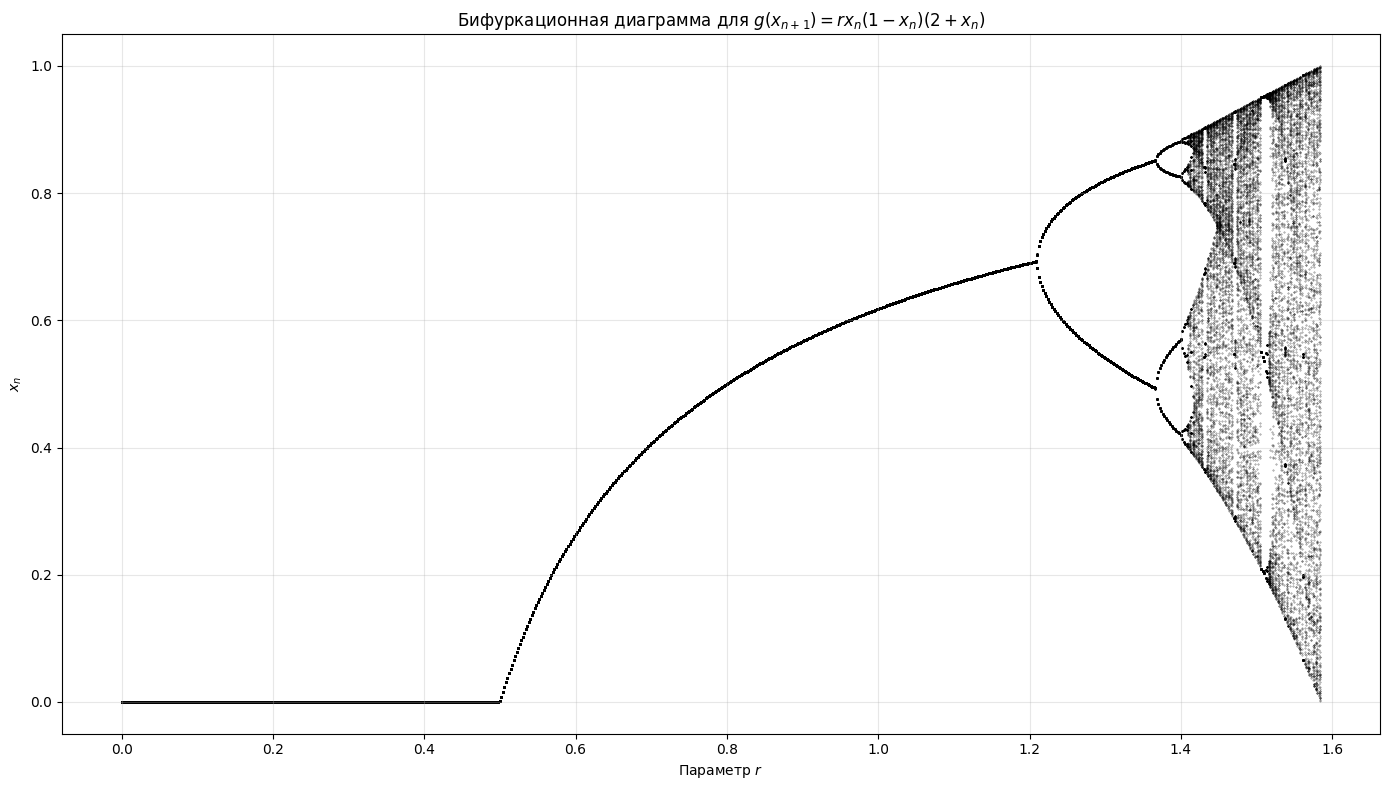

In [ ]:
def g(x, r):
    return r * x * (1 - x) * (2 + x)


def plot_bifurcation_diagram(r_min, r_max, dr, x0=0.1, n_trans=1000, n_plot=200):
    """Строит бифуркационную диаграмму для отображения g(x, r)."""
    r_values = np.arange(r_min, r_max, dr)
    r_plot = []
    x_plot = []

    for r in r_values:
        x = x0
        for _ in range(n_trans):
            x = g(x, r)
        
        for _ in range(n_plot):
            x = g(x, r)
            r_plot.append(r)
            x_plot.append(x)

    return r_plot, x_plot


r_max = 27 / (7 ** 1.5 - 10) / 2

r_all, x_all = plot_bifurcation_diagram(r_min=0, r_max=r_max, dr=0.002, x0=0.1)

plt.figure(figsize=(14, 8))
plt.scatter(r_all, x_all, s=0.1, color='black', alpha=0.6)
plt.title('Бифуркационная диаграмма для $g(x_{n+1}) = r x_n (1 - x_n) (2 + x_n)$')
plt.xlabel('Параметр $r$')
plt.ylabel('$x_n$')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\Владимир\AppData\Local\Temp\ipykernel_38208\2975727850.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Владимир\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


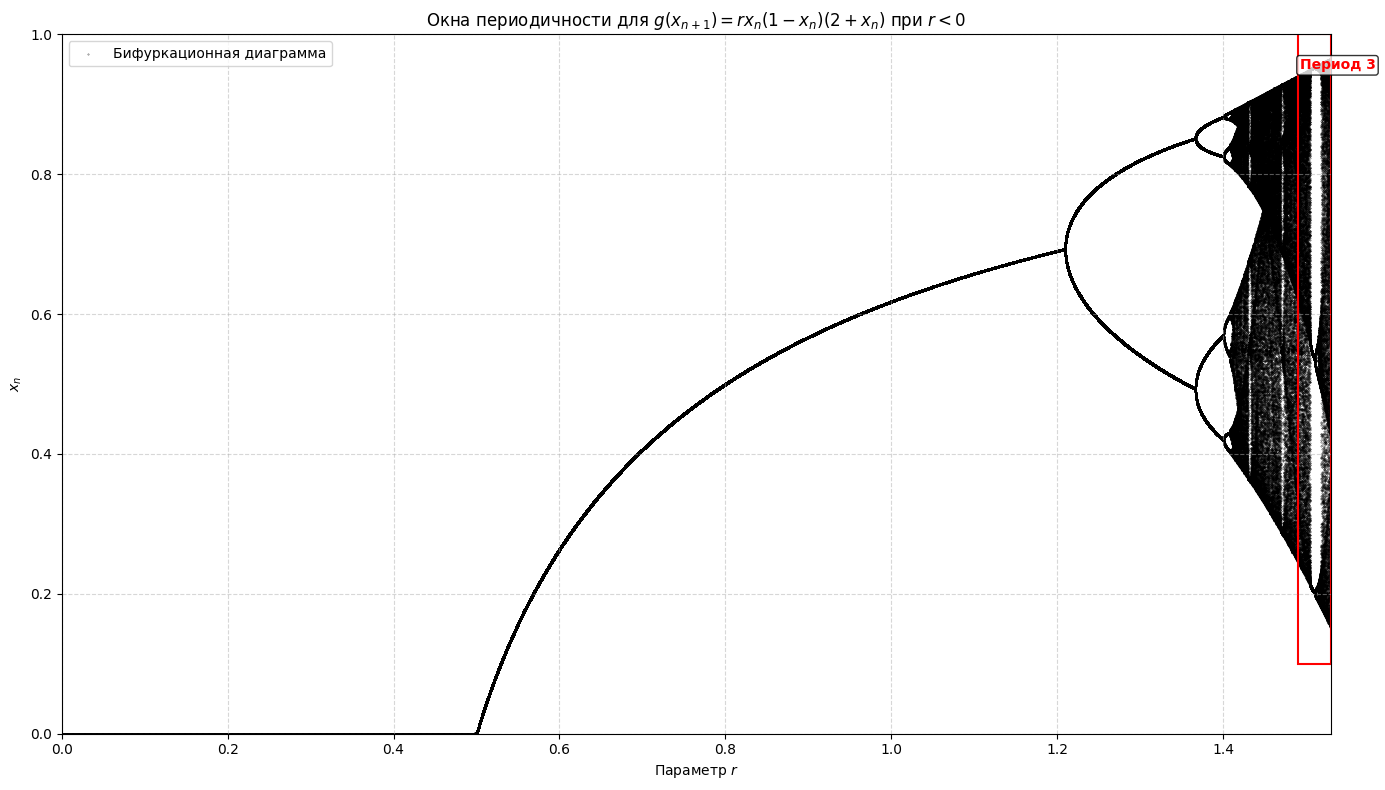

In [ ]:
r_data, x_data = plot_bifurcation_diagram(r_min=0, r_max=r_max, dr=0.0002)

plt.figure(figsize=(14, 8))
plt.scatter(r_data, x_data, s=0.1, color='black', alpha=0.7, label='Бифуркационная диаграмма')

r_min, r_max, y_min, y_max, period, color = 1.49, 1.53, 0.1, 1.0, 3, 'red'

rect = plt.Rectangle((r_min, y_min), r_max - r_min, y_max - y_min, linewidth=1.5, edgecolor=color, facecolor='none')

plt.gca().add_patch(rect)

plt.text(r_min + 0.002, y_max - 0.05, f'Период {period}', 
            color=color, fontweight='bold', fontsize=10,
            bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))

plt.title('Окна периодичности для $g(x_{n+1}) = r x_n (1 - x_n) (2 + x_n)$ при $r < 0$')
plt.xlabel('Параметр $r$')
plt.ylabel('$x_n$')
plt.xlim(0, r_max)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()